# Encontrar relação entre as variáveis PIB Per Capita e Telefones por 1000 Habitantes

In [34]:
from platform import python_version
print(python_version)

<function python_version at 0x7f70b892d550>


In [35]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Carregando conjunto de dados

In [36]:
dataframe = pd.read_csv('countries-of-the-world.csv', decimal=',')

In [37]:
dataframe.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [38]:
dataframe.shape

(227, 20)

In [39]:
dataframe.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

## Análise exploratória e preparação dos dados

In [40]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [41]:
#variável Independente
dataframe['GDP ($ per capita)'].describe()

count      226.000000
mean      9689.823009
std      10049.138513
min        500.000000
25%       1900.000000
50%       5550.000000
75%      15700.000000
max      55100.000000
Name: GDP ($ per capita), dtype: float64

In [42]:
#variável Dependente
dataframe['Phones (per 1000)'].describe()

count     223.000000
mean      236.061435
std       227.991829
min         0.200000
25%        37.800000
50%       176.200000
75%       389.650000
max      1035.600000
Name: Phones (per 1000), dtype: float64

In [43]:
dataframe[['GDP ($ per capita)','Phones (per 1000)']].corr()

,GDP ($ per capita),Phones (per 1000)
GDP ($ per capita),1.000000,0.834499
Phones (per 1000),0.834499,1.000000


In [44]:
dataframe['GDP ($ per capita)'].isna().sum()

1

In [45]:
dataframe['Phones (per 1000)'].isna().sum()

4

In [46]:
dataframe[dataframe['Phones (per 1000)'].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
52,Cyprus,NEAR EAST,784301,9250,84.8,7.01,0.43,7.18,19200.0,97.6,NaN,7.79,4.44,87.77,3.0,12.56,7.68,0.037,0.198,0.765
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,58.6,NaN,4.71,0.67,94.62,2.0,26.99,6.24,0.085,0.231,0.684
140,Montserrat,LATIN AMER. & CARIB,9439,102,92.5,39.22,0.00,7.35,3400.0,97.0,NaN,20.00,0.00,80.00,2.0,17.59,7.10,NaN,NaN,NaN
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400


In [61]:
#Descartando do conjunto de dados os países com ausência de valores em um dos parâmetros estudados


dataframe = dataframe[(dataframe['GDP ($ per capita)'].isna() == False) & (dataframe['Phones (per 1000)'].isna()== False)]

In [63]:
dataframe

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Wallis and Futuna,OCEANIA,16025,274,58.5,47.08,NaN,NaN,3700.0,50.0,118.6,5.00,25.00,70.00,2.0,NaN,NaN,NaN,NaN,NaN
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


## Construção do Modelo de regressão

In [64]:
y = dataframe['Phones (per 1000)']

In [65]:
x = dataframe['GDP ($ per capita)']

In [66]:
x = sm.add_constant(x)

In [68]:
modregl = sm.OLS(y,x)

In [69]:
resultado = modregl.fit()

In [70]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:      Phones (per 1000)   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     506.9
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           4.01e-59
Time:                        20:29:03   Log-Likelihood:                -1393.7
No. Observations:                 223   AIC:                             2791.
Df Residuals:                     221   BIC:                             2798.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 52.4599     11

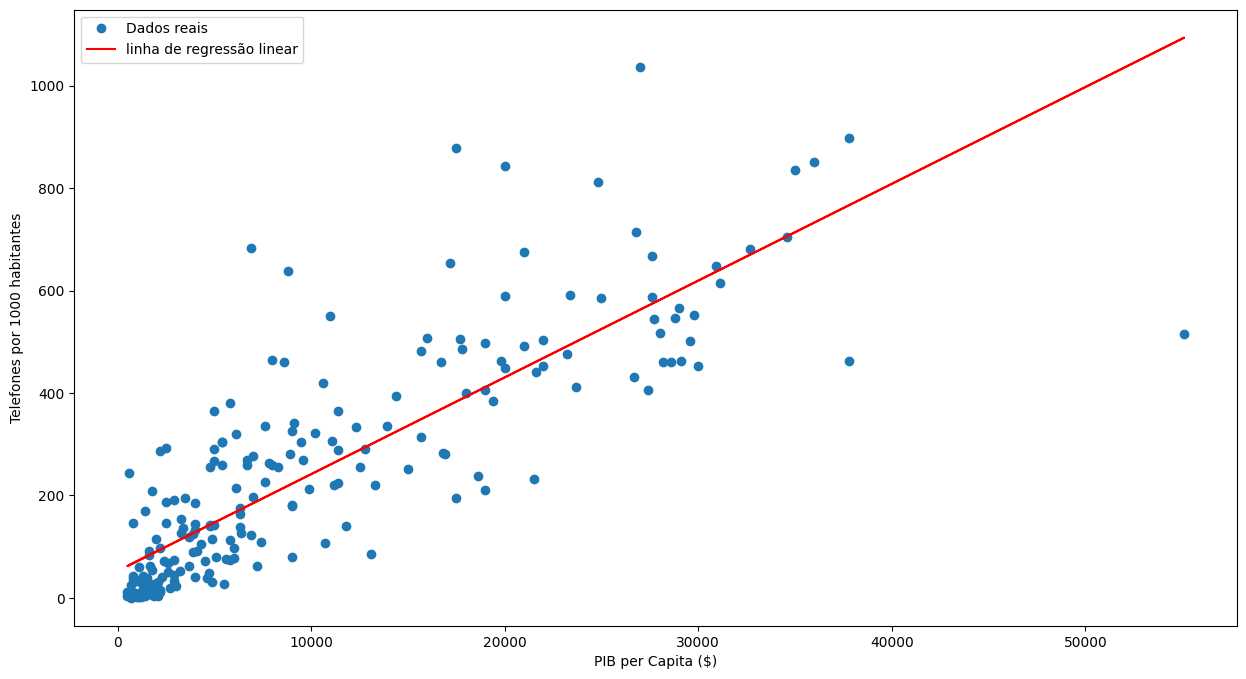

In [77]:
## Gráfico para visualização
plt.figure(figsize = (15,8))
plt.xlabel('PIB per Capita ($)')
plt.ylabel('Telefones por 1000 habitantes')
plt.plot(x['GDP ($ per capita)'], y, 'o', label = 'Dados reais' )
plt.plot(x['GDP ($ per capita)'], resultado.fittedvalues, 'r-', label = 'linha de regressão linear')
plt.legend()
plt.show()